In [1]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout , Activation 

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# Building the model 

model = Sequential()

model.add( Conv2D( 64 , (3,3) , input_shape = (64, 64 , 3) , activation = 'relu' ) )
model.add( MaxPooling2D( pool_size = (2 , 2)  ),  )

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [3]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=128))

model.add(Dense( activation = 'sigmoid', units=1)) 
 


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# Training

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255 , zoom_range = 0.2  )

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_set = train_datagen.flow_from_directory(
        'training',
        target_size=(64, 64),
        class_mode='binary')

Found 647 images belonging to 2 classes.


In [9]:
train_set.class_indices 

{'with helmet': 0, 'without helmet': 1}

In [10]:
test_set = test_datagen.flow_from_directory(
        'testing',
        target_size=(64, 64),
        class_mode='binary')

Found 208 images belonging to 2 classes.


In [11]:
model.fit_generator(
        train_set,
        epochs=4,
        validation_data=test_set)


Epoch 1/4
21/21 [==============================] - 10s 472ms/step - loss: 0.6766 - accuracy: 0.5703 - val_loss: 0.5483 - val_accuracy: 0.5769
Epoch 2/4
21/21 [==============================] - 8s 367ms/step - loss: 0.6033 - accuracy: 0.6723 - val_loss: 0.4018 - val_accuracy: 0.7788
Epoch 3/4
21/21 [==============================] - 8s 367ms/step - loss: 0.4698 - accuracy: 0.7913 - val_loss: 0.9677 - val_accuracy: 0.5962
Epoch 4/4
21/21 [==============================] - 8s 393ms/step - loss: 0.5324 - accuracy: 0.7512 - val_loss: 0.6728 - val_accuracy: 0.7067


In [13]:
from keras.preprocessing import image
test_image= image.load_img('single_prediction/abc.jpg'
                           ,target_size =(64,64))

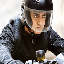

In [14]:
test_image

In [15]:
test_image = image.img_to_array(test_image)

In [16]:
test_image=test_image.reshape(1,64,64,3)

In [18]:
result = model.predict(test_image)
result

array([[0.]], dtype=float32)

In [38]:
{ i[1] : i[0] for i in d.items() }[ int(result[0][0]) ]

'with helmet'